# $Data Cleaning-Part-3$

Lesson Outlines:

0. Exploratory Data Analysis

1. Handling Missing Values
2. Removing Duplicates
3. Fixing Data Types
4. Handling Outliers  

- To simulate errors and clean the data, we will use a artificial hand made example:

- [Read about Statistics](https://www.geeksforgeeks.org/maths/introduction-to-statistics/)
- [Read about Outliers](https://www.geeksforgeeks.org/machine-learning/what-are-outliers-in-data/)

In [233]:
# Sample dataset of e-commerce transactions
# Create a dictionary of multiple data items
data = [
    {"Transaction ID": 1001, "Customer Name": "Alice Smith",    "Email": "alice@example.com",         "Product": "Laptop", "Quantity": 1,     "Price": 1200.00, "Purchase Date": "2024-09-15", "Delivery Status": True},
    {"Transaction ID": 1002, "Customer Name": "Bob Jones",       "Email": None,                       "Product": "Headphones", "Quantity": 2, "Price": 150.00, "Purchase Date": "2024-09-16", "Delivery Status": True},
    {"Transaction ID": 1003, "Customer Name": "Charlie Johnson", "Email": "charlie#example.com",       "Product": "Smartphone", "Quantity": 5, "Price": 800.00, "Purchase Date": "16/09/2024", "Delivery Status": True},
    {"Transaction ID": 1004, "Customer Name": "David Lee",       "Email": "david.lee@example.com",    "Product": "Laptop", "Quantity": 1,    "Price": 1200.00, "Purchase Date": "2024-09-17", "Delivery Status": False},
    {"Transaction ID": 1005, "Customer Name": "Eve Martinez",    "Email": "eve.martinez@example.com", "Product": "Smartwatch", "Quantity": 2,"Price": None, "Purchase Date": "17th Sep 2024", "Delivery Status": True},
    {"Transaction ID": 1006, "Customer Name": "Frank Wright",    "Email": None,                       "Product": "Tablet", "Quantity": None, "Price": 600.00, "Purchase Date": "2024-09-18", "Delivery Status": False},
    {"Transaction ID": 1007, "Customer Name": 23,                "Email": "grace.lee@example.com",   "Product": "Laptop", "Quantity": 1,    "Price": 1200.00, "Purchase Date": "2024-09-19", "Delivery Status": True},
    {"Transaction ID": 1008, "Customer Name": "Hank Brown",      "Email": "hank.brown@example.com",   "Product": "Monitor", "Quantity": 2,   "Price": 300.00, "Purchase Date": "09/19/2024", "Delivery Status": True},
    {"Transaction ID": 1009, "Customer Name": "Ivy Thompson",    "Email": None,                        "Product": "Keyboard", "Quantity": 2, "Price": 100.00, "Purchase Date": "2024/09/20", "Delivery Status": False},
    {"Transaction ID": 1010, "Customer Name": "Jack Davis",      "Email": "jack@example.com",         "Product": "Mouse", "Quantity": 1,     "Price": 50.00, "Purchase Date": "2024-09-21", "Delivery Status": True},
    {"Transaction ID": 1005, "Customer Name": "Eve Martinez",    "Email": "eve.martinez@example.com", "Product": "Smartwatch", "Quantity": 2,"Price": None, "Purchase Date": "17th Sep 2024", "Delivery Status": True}, # Duplicate entry
    {"Transaction ID": 1011, "Customer Name": "Alice Smith",    "Email": "alice@example.com",         "Product": "Laptop", "Quantity": 1,    "Price": 1200.00, "Purchase Date": "2024-09-15", "Delivery Status": True},  
    {"Transaction ID": 1012, "Customer Name": "Kurt Evans",     "Email": "kurt.evans@example.com",     "Product": "Smartwatch","Quantity": -1,"Price": 200.00, "Purchase Date": "2024-09-22", "Delivery Status": True},  # Outlier quantity
    {"Transaction ID": 1013, "Customer Name": "Liam Adams",     "Email": "liam.adams@example.com",    "Product": "Headphones", "Quantity": 2, "Price": 150.00, "Purchase Date": "2024-09-23", "Delivery Status": False},
    {"Transaction ID": 1014, "Customer Name": "Mia Clark",       "Email": "mia.clark@example.com",     "Product": None, "Quantity": 1,        "Price": 0,      "Purchase Date": "2024-09-24", "Delivery Status": True},  # Price anomaly
    {"Transaction ID": 1005, "Customer Name": "Eve Martinez",    "Email": "eve.martinez@example.com", "Product": "Smartwatch", "Quantity": 2,"Price": None, "Purchase Date": "17th Sep 2024", "Delivery Status": True}, # Duplicate entry    {"Transaction ID": 1015, "Customer Name": "Nina Turner",     "Email": None,                         "Product": "Tablet", "Quantity": 1,     "Price": 600.00, "Purchase Date": "24-09-2024", "Delivery Status": True},
    {"Transaction ID": 1016, "Customer Name": "Oscar Harris",    "Email": "oscar.harris@example.com",  "Product": "Laptop", "Quantity": 2,    "Price": 1200.00, "Purchase Date": "2024-09-25", "Delivery Status": True},
    {"Transaction ID": 1017, "Customer Name": "Paul Young",     "Email": "paulyoung",                  "Product": "Monitor", "Quantity": 2,   "Price": 300.00, "Purchase Date": "09/25/2024", "Delivery Status": True},
    {"Transaction ID": 1018, "Customer Name": "Quinn Lopez",    "Email": None,                         "Product": "Smartphone", "Quantity": 1,"Price": 800.00, "Purchase Date": "2024-09-26", "Delivery Status": False},
    {"Transaction ID": 1019, "Customer Name": "Rachel Scott",    "Email": "rachel.scott@example.com",  "Product": "Keyboard", "Quantity": 2,  "Price": 100.00, "Purchase Date": "2024-09-27", "Delivery Status": True},
    {"Transaction ID": 1020, "Customer Name": "Steve King",     "Email": "steve.king@example.com",     "Product": "Mouse", "Quantity": None,  "Price": 50.00, "Purchase Date": "2024-09-28", "Delivery Status": True},
]

# Displaying the dataset
import pandas as pd

# Convert the list of dictionaries to a DataFrame for easier visualization and manipulation
df = pd.DataFrame(data)
df.head()

,Transaction ID,Customer Name,Email,Product,Quantity,Price,Purchase Date,Delivery Status
0,1001,Alice Smith,alice@example.com,Laptop,1.0,1200.0,2024-09-15,True
1,1002,Bob Jones,NaN,Headphones,2.0,150.0,2024-09-16,True
2,1003,Charlie Johnson,charlie#example.com,Smartphone,5.0,800.0,16/09/2024,True
3,1004,David Lee,david.lee@example.com,Laptop,1.0,1200.0,2024-09-17,False
4,1005,Eve Martinez,eve.martinez@example.com,Smartwatch,2.0,NaN,17th Sep 2024,True


## **Outlier Handling**
- **IQR method**:

In [234]:
import pandas as pd

df = pd.DataFrame({
    'age':         [3,25,26,27,28,29,25,26,78,21,24,22,65],
    'temperature': [1,20,22,35,31,30,29,33,26,26,27,29,99,],
    'amount': [x for x in range(1,12)] + [45,98]
})

df

,age,temperature,amount
0,3,1,1
1,25,20,2
2,26,22,3
3,27,35,4
4,28,31,5
5,29,30,6
6,25,29,7
7,26,33,8
8,78,26,9
9,21,26,10


In [235]:
# basic pandas filtering
# I knew what the range should be
# i knew what the Lower limit and Upper limit should

df_age = df[(df['age'] < 30) & (df['age'] >20)] # should only have normal values 
df_age

,age,temperature,amount
1,25,20,2
2,26,22,3
3,27,35,4
4,28,31,5
5,29,30,6
6,25,29,7
7,26,33,8
9,21,26,10
10,24,27,11
11,22,29,45


- data----> increasing order ----> break into 4 parts ---- quarters ----
- From 100% of the data if you are taking only the:
    - first 25% ----> First Quantile 
    - first 50% ----> Second Quantile 
    - first 75% ----> Third Quantile
    - first 100% ----> Fourth Quantile 

- A range of valid data:
    - IQR - Inter Quartile Range
    - from 25% to 75%
    - rest treat them as outliers

In [236]:
Q1 = df['amount'].quantile(0.25) # first quantile /quarter

Q2 = df['amount'].quantile(0.50) # Second quantile /quarter

Q3 = df['amount'].quantile(0.75)# third quantile /quarter

IQR = Q3 - Q1

In [237]:
# Defining Boundaries
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_limit) | (df['amount'] > upper_limit)]
outliers

,age,temperature,amount
11,22,29,45
12,65,99,98


In [238]:
Q1 = df['age'].quantile(0.25) # first quantile /quarter

Q2 = df['age'].quantile(0.50) # Second quantile /quarter

Q3 = df['age'].quantile(0.75)# third quantile /quarter

IQR = Q3 - Q1

In [239]:
# Defining Boundaries
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_limit) | (df['age'] > upper_limit)]
outliers['age']

0      3
8     78
12    65
Name: age, dtype: int64

In [240]:
Q1 = df['temperature'].quantile(0.25) # first quantile /quarter

Q2 = df['temperature'].quantile(0.50) # Second quantile /quarter

Q3 = df['temperature'].quantile(0.75)# third quantile /quarter

IQR = Q3 - Q1

In [241]:
# Defining Boundaries
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['temperature'] < lower_limit) | (df['temperature'] > upper_limit)]
outliers['temperature']

0      1
12    99
Name: temperature, dtype: int64

### IQR Method for all num features at once


- 

In [242]:
numeric_columns = ['age','amount','temperature']

numeric_columns = df.select_dtypes(include= ['number']).columns

# run the IQR method for all at once

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # keep only the relevant data
    df_clean1 = df [(df[col] >= lower) & (df[col]<= upper)]

df_clean1


,age,temperature,amount
0,3,1,1
1,25,20,2
2,26,22,3
3,27,35,4
4,28,31,5
5,29,30,6
6,25,29,7
7,26,33,8
8,78,26,9
9,21,26,10


### Finding Outliers

In [243]:
# basic exploration
df.describe()

,age,temperature,amount
count,13.000000,13.000000,13.000000
mean,30.692308,31.384615,16.076923
std,19.426720,22.020969,27.041516
min,3.000000,1.000000,1.000000
25%,24.000000,26.000000,4.000000
50%,26.000000,29.000000,7.000000
75%,28.000000,31.000000,10.000000
max,78.000000,99.000000,98.000000


<Axes: >

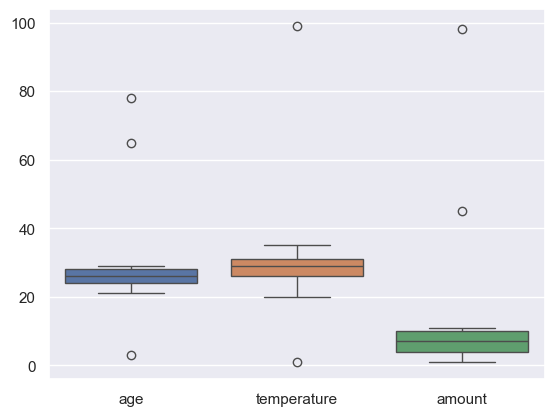

In [244]:
# use visualizations
# box plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1)

sns.boxplot(df)

# plt.grid()

<Axes: >

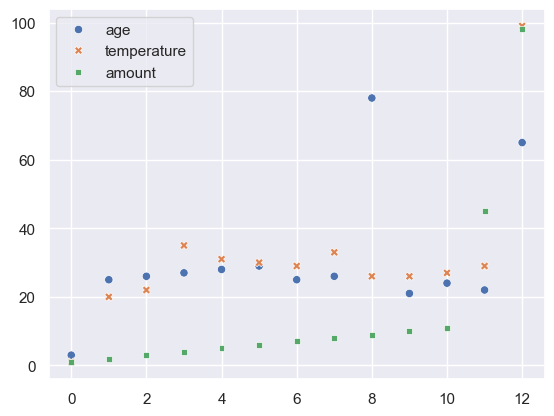

In [245]:
# scatter plot
# anything away from normal data 
sns.scatterplot(df)

<Axes: xlabel='age', ylabel='temperature'>

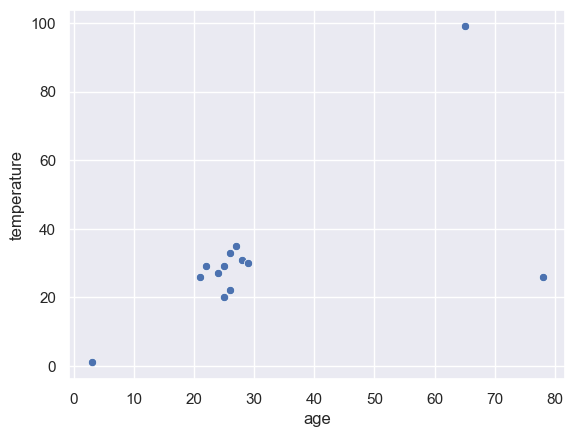

In [246]:
sns.scatterplot(df, x= 'age' , y= 'temperature' )

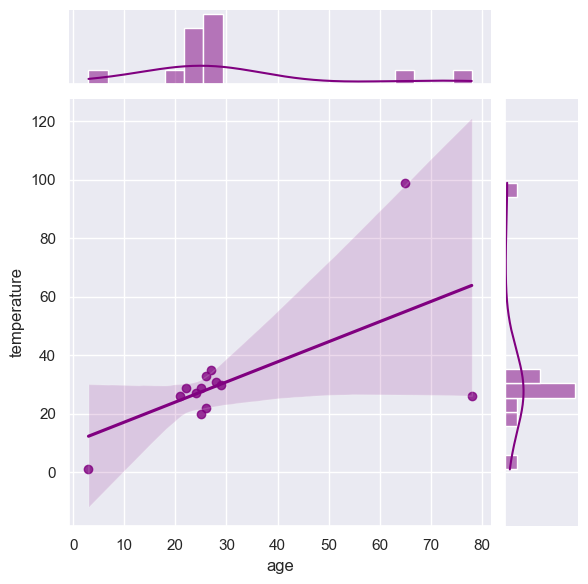

In [247]:
sns.jointplot(df, x= 'age' , y= 'temperature', 
            marginal_kws=dict(bins = 20, fill = True), 
            kind= 'reg',
            color= 'purple' )

In [248]:
# use the z scores to find outliers
# z - score
import numpy as np
from scipy import stats

df['age_zscore'] = np.abs(stats.zscore(df['age']))
df['temperature_zscore'] = np.abs(stats.zscore(df['temperature']))
df['amount_zscore'] = np.abs(stats.zscore(df['amount']))

# we only want to flag data that is 3 standard deviations away

outliers = df[ (df['age_zscore'] > 1.3) | (df['temperature_zscore'] > 1.3) | (df['amount_zscore'] > 1.3) ]
outliers

,age,temperature,amount,age_zscore,temperature_zscore,amount_zscore
0,3,1,1,1.483682,1.436145,0.580314
8,78,26,9,2.534623,0.254507,0.272392
12,65,99,98,1.838117,3.195878,3.153235


#### Remove outliers using the Z-score method

<Axes: >

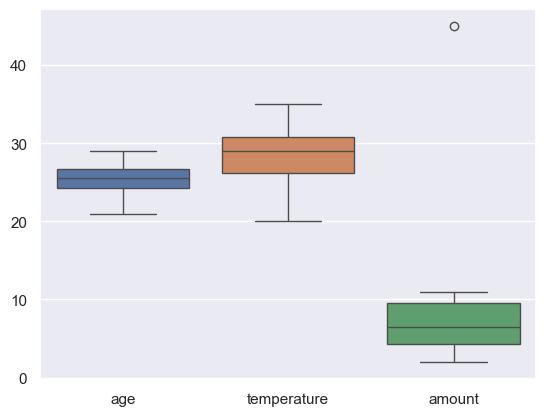

In [249]:
df_clean = df.drop(index= outliers.index)

sns.boxplot(df_clean[['age','temperature','amount']])

In [250]:
df_clean

,age,temperature,amount,age_zscore,temperature_zscore,amount_zscore
1,25,20,2,0.304979,0.538100,0.541823
2,26,22,3,0.251402,0.443569,0.503333
3,27,35,4,0.197824,0.170883,0.464843
4,28,31,5,0.144247,0.018179,0.426353
5,29,30,6,0.090669,0.065445,0.387863
6,25,29,7,0.304979,0.112710,0.349372
7,26,33,8,0.251402,0.076352,0.310882
9,21,26,10,0.519289,0.254507,0.233902
10,24,27,11,0.358556,0.207241,0.195412
11,22,29,45,0.465711,0.112710,1.113255


In [251]:
df_clean['amount_zscore'] = np.abs(stats.zscore(df_clean['amount']))
df_clean['amount_zscore']

1     0.677617
2     0.593960
3     0.510304
4     0.426648
5     0.342991
6     0.259335
7     0.175678
9     0.008366
10    0.075291
11    2.919608
Name: amount_zscore, dtype: float64

In [252]:
amount_outliers = df_clean[ df_clean['amount_zscore'] > 1.3 ]
amount_outliers

,age,temperature,amount,age_zscore,temperature_zscore,amount_zscore
11,22,29,45,0.465711,0.11271,2.919608


In [253]:
df_clean2 = df_clean.drop(index= amount_outliers.index)

<Axes: >

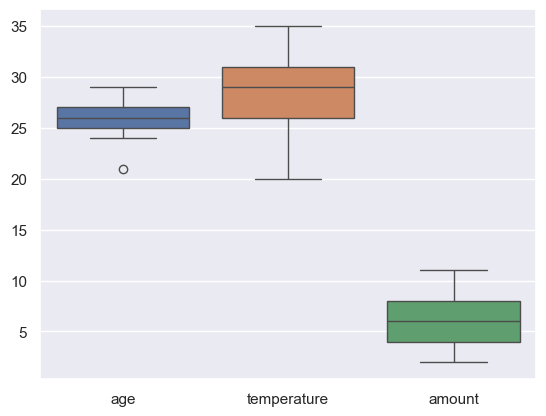

In [254]:
sns.boxplot(df_clean2[['age','temperature','amount']])

In [255]:
df_clean2

,age,temperature,amount,age_zscore,temperature_zscore,amount_zscore
1,25,20,2,0.304979,0.538100,0.677617
2,26,22,3,0.251402,0.443569,0.593960
3,27,35,4,0.197824,0.170883,0.510304
4,28,31,5,0.144247,0.018179,0.426648
5,29,30,6,0.090669,0.065445,0.342991
6,25,29,7,0.304979,0.112710,0.259335
7,26,33,8,0.251402,0.076352,0.175678
9,21,26,10,0.519289,0.254507,0.008366
10,24,27,11,0.358556,0.207241,0.075291
